In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Obtain the Dataset: Download the data from https://github.com/bookingcom/ml-dataset-mdt
Explore the Dataset: Explore it using Python libraries like pandas for data manipulation and numpy for numerical operations.

In [2]:
train_data = pd.read_csv('train_set.csv')

In [3]:
train_data.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1000027,2016-08-13,2016-08-14,8183,desktop,7168,Elbonia,Gondal,1000027_1
1,1000027,2016-08-14,2016-08-16,15626,desktop,7168,Elbonia,Gondal,1000027_1
2,1000027,2016-08-16,2016-08-18,60902,desktop,7168,Elbonia,Gondal,1000027_1
3,1000027,2016-08-18,2016-08-21,30628,desktop,253,Elbonia,Gondal,1000027_1
4,1000033,2016-04-09,2016-04-11,38677,mobile,359,Gondal,Cobra Island,1000033_1


In [4]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166835 entries, 0 to 1166834
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   user_id         1166835 non-null  int64 
 1   checkin         1166835 non-null  object
 2   checkout        1166835 non-null  object
 3   city_id         1166835 non-null  int64 
 4   device_class    1166835 non-null  object
 5   affiliate_id    1166835 non-null  int64 
 6   booker_country  1166835 non-null  object
 7   hotel_country   1166835 non-null  object
 8   utrip_id        1166835 non-null  object
dtypes: int64(3), object(6)
memory usage: 80.1+ MB


,user_id,city_id,affiliate_id
count,1.166835e+06,1.166835e+06,1.166835e+06
mean,3.129535e+06,3.347059e+04,5.719503e+03
std,1.808045e+06,1.958255e+04,3.964435e+03
min,2.900000e+01,2.000000e+00,5.000000e+00
25%,1.562185e+06,1.701300e+04,9.340000e+02
50%,3.126222e+06,3.228200e+04,6.309000e+03
75%,4.701432e+06,5.112800e+04,9.924000e+03
max,6.258087e+06,6.756500e+04,1.069700e+04


In [5]:
# Example query: Find the most popular city in the training data
popular_city = train_data['city_id'].value_counts().head(10)
print(popular_city)

city_id
47499    11242
23921    10511
36063     9559
17013     9011
29319     8179
64876     7784
55128     7763
17127     6893
2416      6641
66648     6625
Name: count, dtype: int64


In [6]:
# Check for incomplete/null data
null_counts = train_data.isnull().sum()

# Create a DataFrame with column names and their corresponding null counts
null_info = pd.DataFrame({'Column': null_counts.index, 'Null Count': null_counts.values})

# Sort the DataFrame by null counts in descending order
sorted_null_info = null_info.sort_values(by='Null Count', ascending=False)

# Display the sorted information
print("Columns with null values and their counts:")
print(sorted_null_info)

Columns with null values and their counts:
           Column  Null Count
0         user_id           0
1         checkin           0
2        checkout           0
3         city_id           0
4    device_class           0
5    affiliate_id           0
6  booker_country           0
7   hotel_country           0
8        utrip_id           0


In [7]:
print(f"Train data shape: {train_data.shape}")
#print(f"Test data shape: {test_data.shape}")

# Display basic information about the dataset
print(train_data.info())

# Display descriptive statistics
print(train_data.describe())

Train data shape: (1166835, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166835 entries, 0 to 1166834
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   user_id         1166835 non-null  int64 
 1   checkin         1166835 non-null  object
 2   checkout        1166835 non-null  object
 3   city_id         1166835 non-null  int64 
 4   device_class    1166835 non-null  object
 5   affiliate_id    1166835 non-null  int64 
 6   booker_country  1166835 non-null  object
 7   hotel_country   1166835 non-null  object
 8   utrip_id        1166835 non-null  object
dtypes: int64(3), object(6)
memory usage: 80.1+ MB
None
            user_id       city_id  affiliate_id
count  1.166835e+06  1.166835e+06  1.166835e+06
mean   3.129535e+06  3.347059e+04  5.719503e+03
std    1.808045e+06  1.958255e+04  3.964435e+03
min    2.900000e+01  2.000000e+00  5.000000e+00
25%    1.562185e+06  1.701300e+04  9.340000e+02
50%    

In [8]:
# Check for missing values - there are no missing values in the dataset, it is clean
print(train_data.isnull().sum())

user_id           0
checkin           0
checkout          0
city_id           0
device_class      0
affiliate_id      0
booker_country    0
hotel_country     0
utrip_id          0
dtype: int64


In [9]:
# Display unique values for categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {train_data[col].nunique()}")

Unique values in checkin: 425
Unique values in checkout: 425
Unique values in device_class: 3
Unique values in booker_country: 5
Unique values in hotel_country: 195
Unique values in utrip_id: 217686


checkin
2016-08-08    9672
2016-08-10    9383
2016-08-09    9261
2016-08-07    9252
2016-08-06    9055
2016-08-11    9054
2016-08-12    8907
2016-08-13    8749
2016-08-05    8621
2016-08-14    8525
Name: count, dtype: int64
checkout
2016-08-10    9549
2016-08-11    9428
2016-08-12    9299
2016-08-09    9186
2016-08-08    9129
2016-08-13    9113
2016-08-14    8889
2016-08-06    8696
2016-08-07    8651
2016-08-05    8612
Name: count, dtype: int64
device_class
desktop    753860
mobile     331856
tablet      81119
Name: count, dtype: int64
booker_country
Gondal                  536036
The Devilfire Empire    286244
Elbonia                 235344
Tcherkistan              80573
Bartovia                 28638
Name: count, dtype: int64
hotel_country
Cobra Island              137791
Fook Island               117717
Gondal                    104979
Glubbdubdrib               74840
Elbonia                    53965
Borginia                   45629
Kangan                     44876
Bozatta          

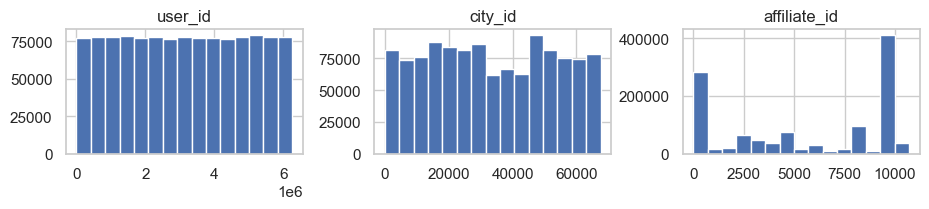

In [10]:
# Value counts for categorical columns
for col in categorical_columns:
    print(train_data[col].value_counts().head(10))

# Set seaborn style for better visualizations
sns.set(style="whitegrid")

# Plot histograms for numerical features
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.show()


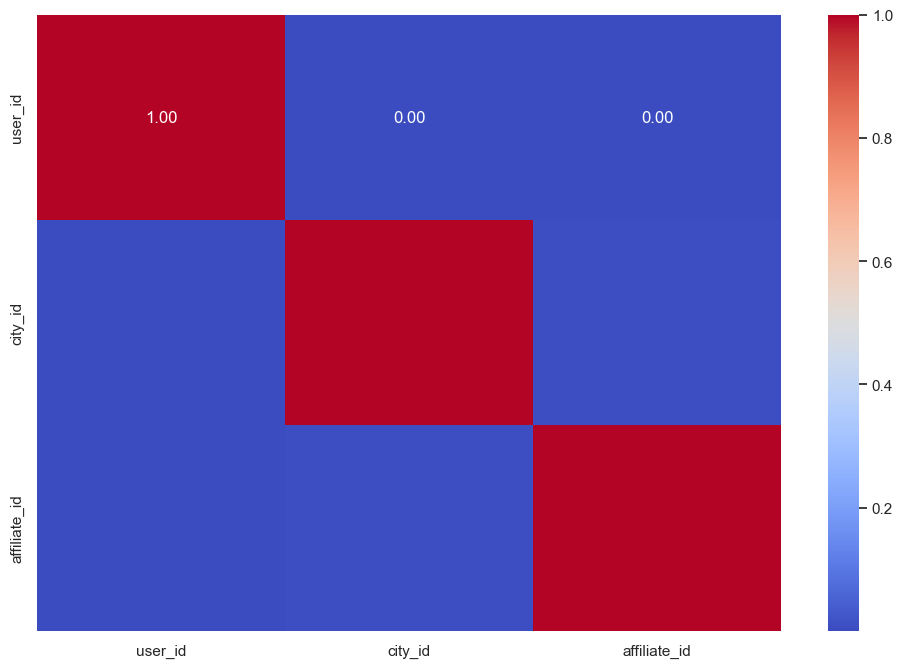

In [11]:
# Plot correlation matrix - not applicable
corr_matrix = train_data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [12]:
train_data['checkin'] = pd.to_datetime(train_data['checkin'])
train_data['checkout'] = pd.to_datetime(train_data['checkout'])

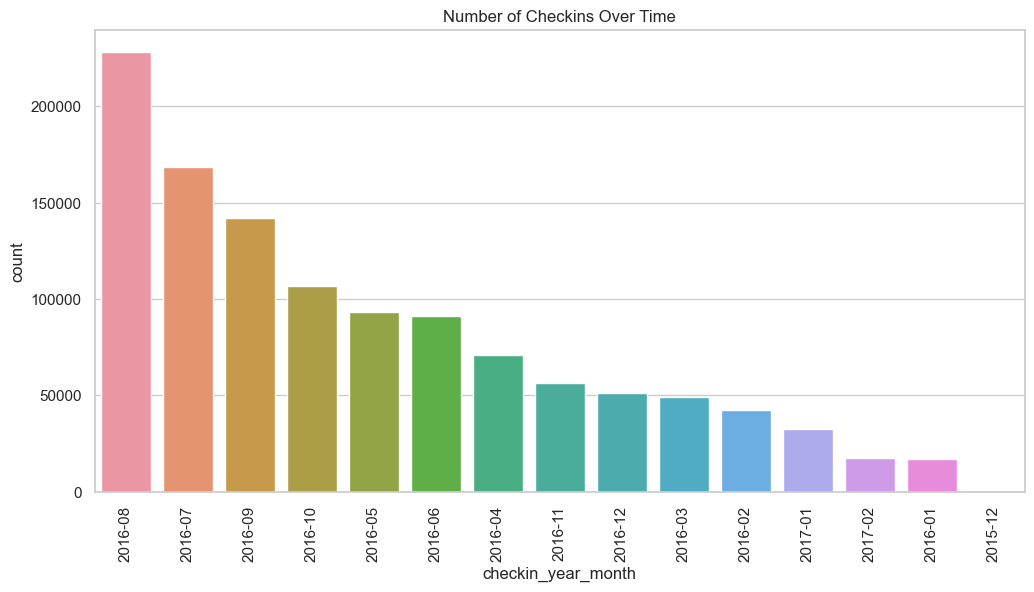

In [13]:
# TIME SERIES ANALYSIS WITH DATES AND NUMBER OF BOOKINGS
# Extract year and month for analysis
train_data['checkin_year_month'] = train_data['checkin'].dt.to_period('M')

# Plot number of bookings over time
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='checkin_year_month', order=train_data['checkin_year_month'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Checkins Over Time')
plt.show()

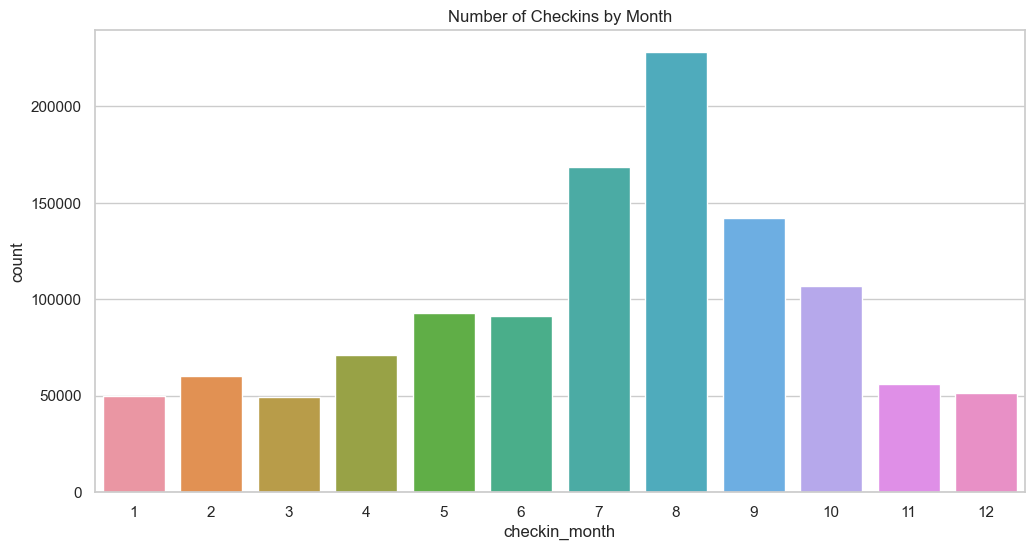

In [14]:
# Extract month and day of the week for seasonality analysis
train_data['checkin_month'] = train_data['checkin'].dt.month
train_data['checkin_day_of_week'] = train_data['checkin'].dt.dayofweek

# Plot bookings by month
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='checkin_month')
plt.title('Number of Checkins by Month')
plt.show()


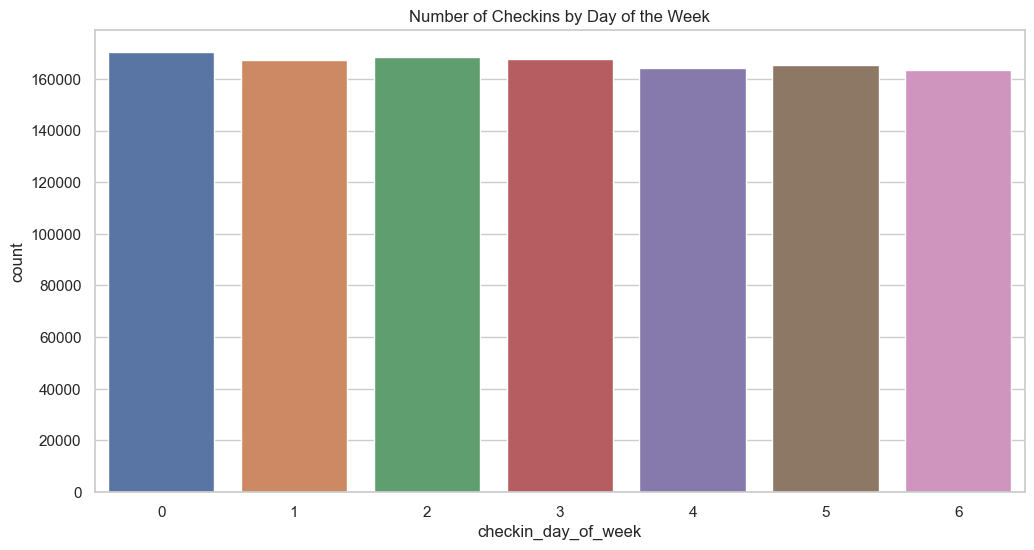

In [15]:
# Plot bookings by day of the week - no significant difference between checkins on different days of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='checkin_day_of_week')
plt.title('Number of Checkins by Day of the Week')
plt.show()

In [16]:
# New feature: trip_duration 
train_data['trip_duration'] = (train_data['checkout'] - train_data['checkin']).dt.days
# Convert date columns to datetime format


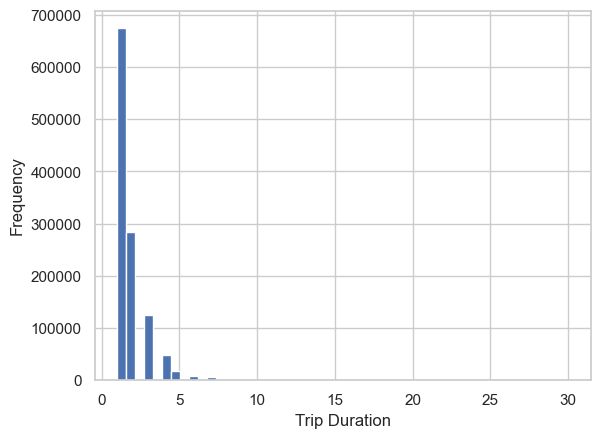

In [17]:
# Visualize the distribution of trip_duration - Typically under 5 days, some upto 10 days
train_data['trip_duration'].hist(bins=50)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


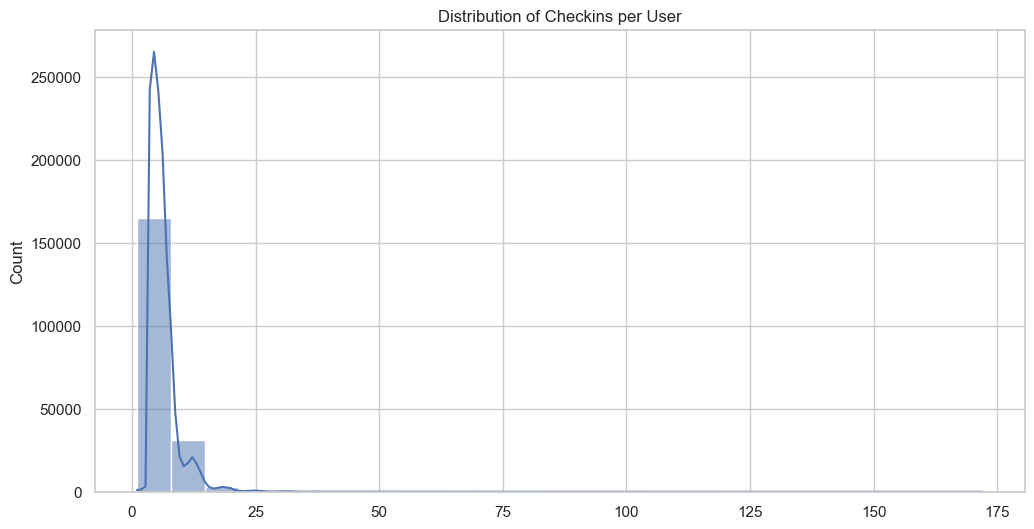

In [18]:
# Calculate number of bookings per user
user_checkins = train_data.groupby('user_id').size()

# Plot distribution of bookings per user
plt.figure(figsize=(12, 6))
sns.histplot(user_checkins, bins=25, kde=True)
plt.title('Distribution of Checkins per User')
plt.show()

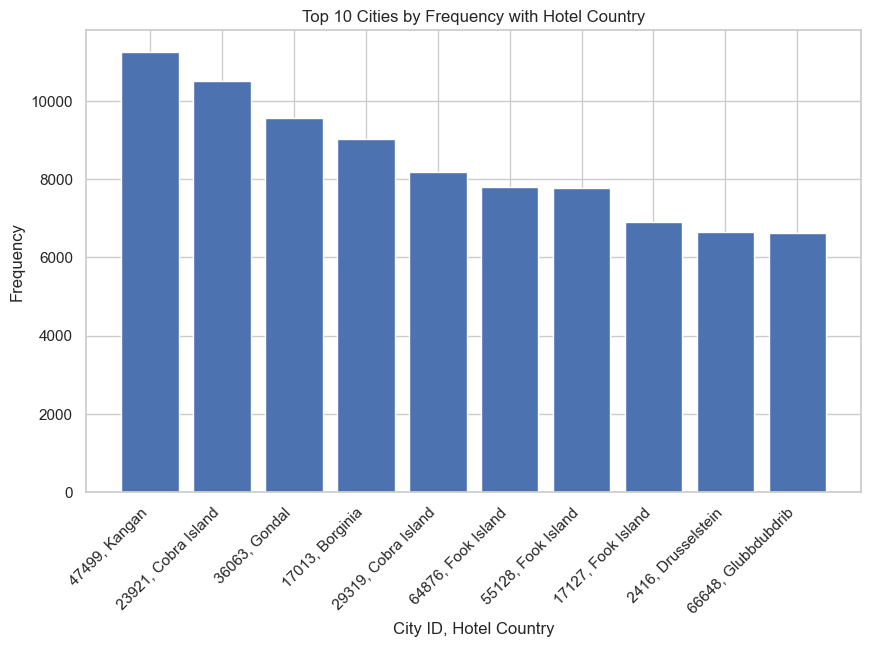

In [19]:
# Create a new DataFrame with city ID and hotel country
city_country_df = train_data[['city_id', 'hotel_country']]

# Group by city ID and hotel country, count occurrences, and select top 10
top_cities_countries = city_country_df.value_counts().head(10).reset_index(name='frequency')

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_cities_countries['city_id'].astype(str) + ', ' + top_cities_countries['hotel_country'], top_cities_countries['frequency'])
plt.xlabel('City ID, Hotel Country')
plt.ylabel('Frequency')
plt.title('Top 10 Cities by Frequency with Hotel Country')
plt.xticks(rotation=45, ha='right')
plt.show()

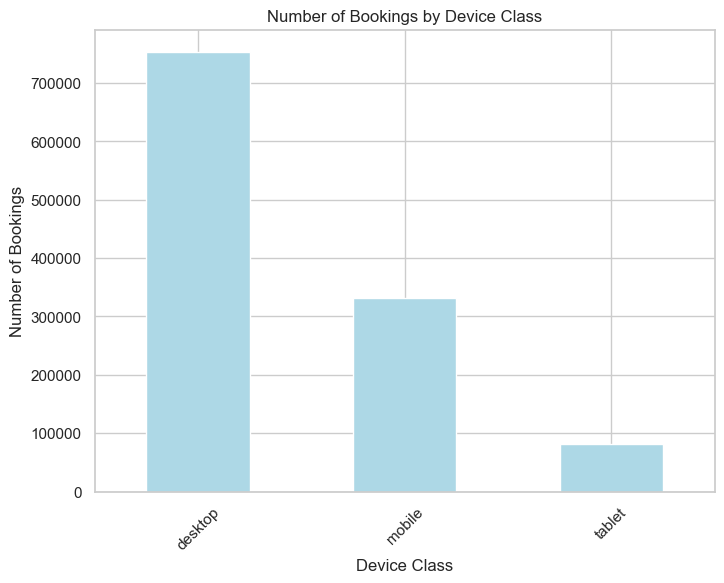

In [20]:
# Number of bookings for each device class
device_counts = train_data['device_class'].value_counts()

# Plot  bar graph
device_counts.plot(kind='bar', figsize=(8, 6), color='lightblue')
plt.title('Number of Bookings by Device Class')
plt.xlabel('Device Class')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

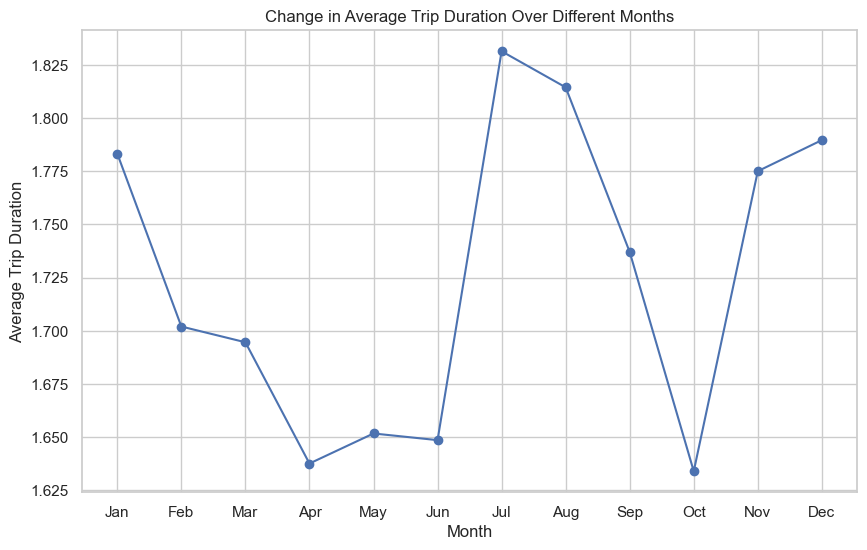

In [21]:
# Check seasonality
train_data['checkin_month'] = train_data['checkin'].dt.month

# Calculate the average trip duration for each month
average_trip_duration = train_data.groupby('checkin_month')['trip_duration'].mean()

# Plot the change in trip duration over different months
plt.figure(figsize=(10, 6))
average_trip_duration.plot(kind='line', marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration')
plt.title('Change in Average Trip Duration Over Different Months')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# seasonality peaks in Jan, Jul and December possibiliy winter/ summer holiday season

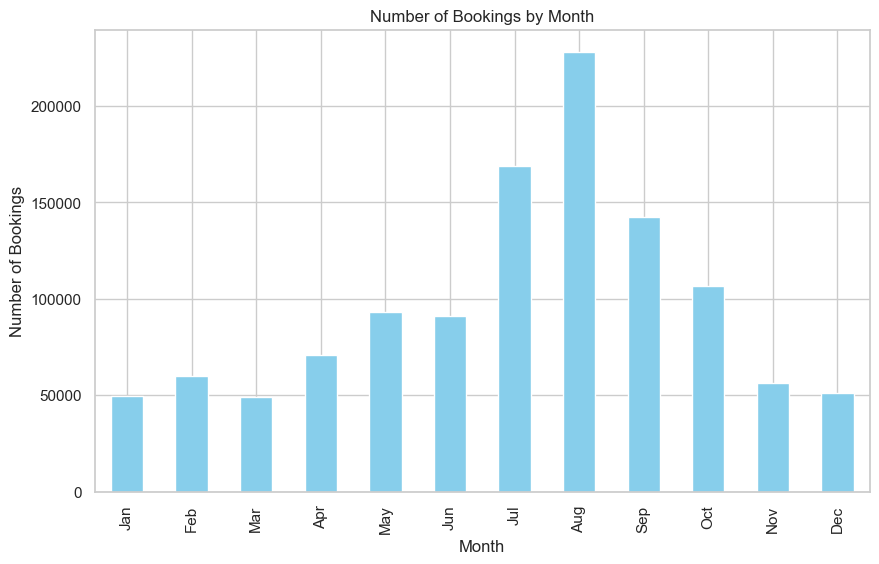

In [22]:
# Group  data by month and count the number of bookings
monthly_bookings = train_data['checkin_month'].value_counts().sort_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot bar graph
monthly_bookings.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(12), months)  # Replace x-axis labels with month names
plt.show()

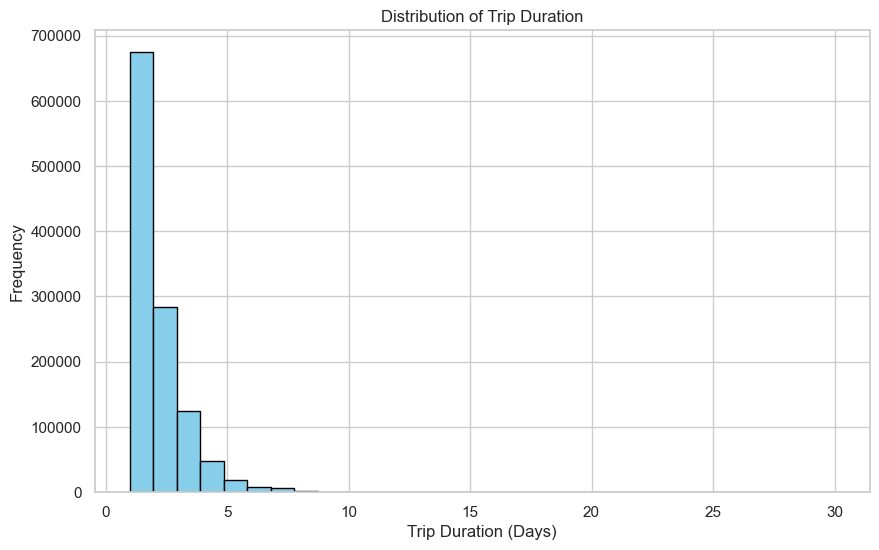

In [23]:
# Distribution of Trip Length (in days)
plt.figure(figsize=(10, 6))
plt.hist(train_data['trip_duration'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Trip Duration (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.grid(True)
plt.show()

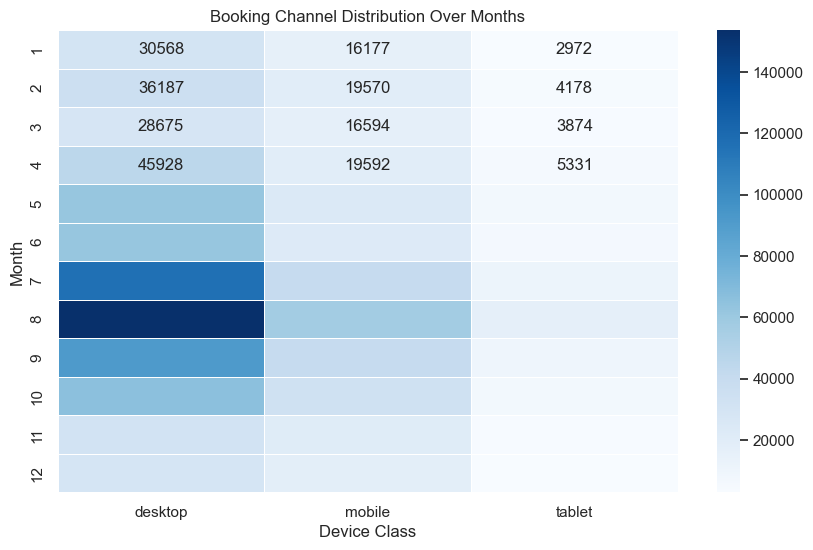

In [24]:
pivot_table = train_data.pivot_table(index='checkin_month', columns='device_class', aggfunc='size')

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g', linewidths=0.5)
plt.title('Booking Channel Distribution Over Months')
plt.xlabel('Device Class')
plt.ylabel('Month')
plt.show()

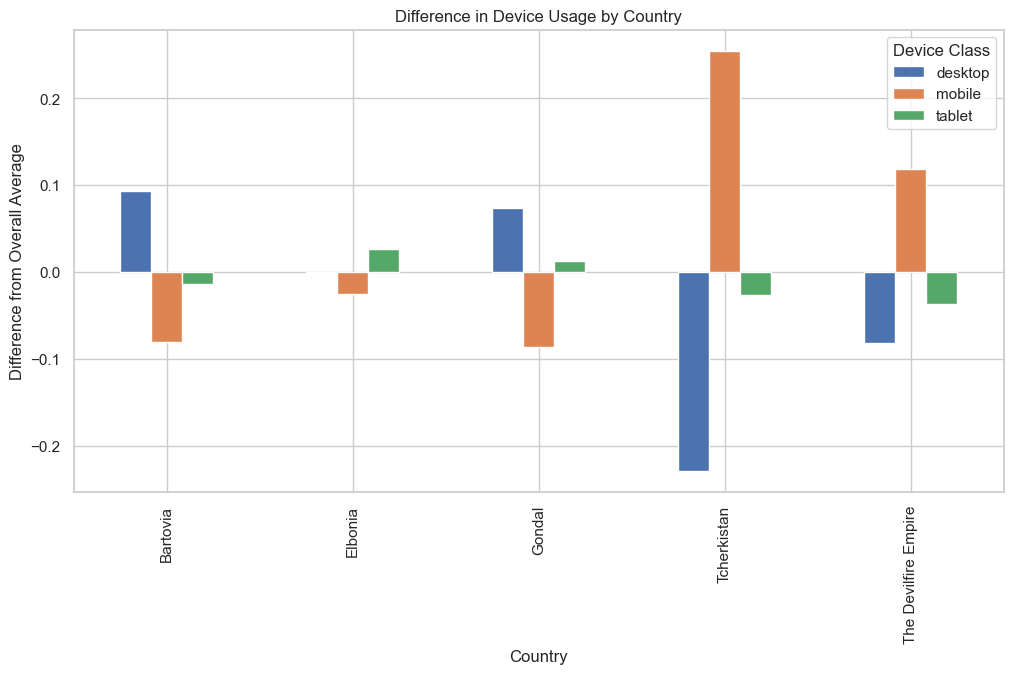

In [25]:
# Calculate overall average proportion of each device class
overall_avg_device = train_data['device_class'].value_counts(normalize=True)

# Calculate proportion of each device class used by each country
device_proportion_by_country = train_data.groupby('booker_country')['device_class'].value_counts(normalize=True).unstack().fillna(0)

# Calculate difference between each country's device proportion and overall average
device_difference = device_proportion_by_country.sub(overall_avg_device)

device_difference.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Difference from Overall Average')
plt.title('Difference in Device Usage by Country')
plt.legend(title='Device Class')
plt.show()

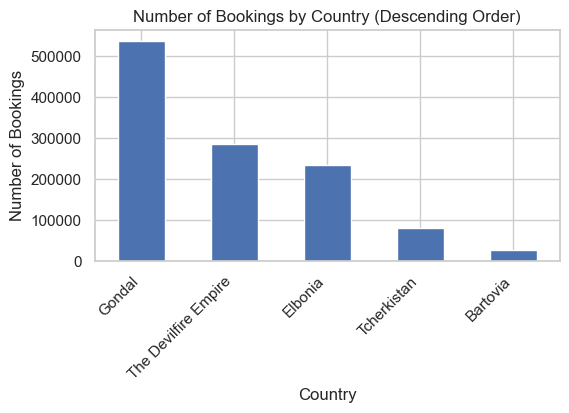

In [26]:
# Calculate number of bookings for each country
country_bookings = train_data['booker_country'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 3))
country_bookings.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Country (Descending Order)')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [27]:
# Calculate number of bookings per user 

user_bookings = train_data.groupby('user_id').size() 

# Identify repeat customers (those with more than one booking) 
repeat_customers = user_bookings[user_bookings > 1].index
train_data['is_repeat_customer'] = train_data['user_id'].isin(repeat_customers) 

# Calculate repeat customer rate 
repeat_customer_rate = train_data['is_repeat_customer'].mean() 
print(f"Repeat customer rate: {repeat_customer_rate:.2%}") 

# Plot booking behavior of repeat vs. non-repeat customers 
#plt.figure(figsize=(12, 6)) 
#sns.countplot(data=train_data, x='user_id', hue='is_repeat_customer') 
#plt.title('Booking Behavior of Repeat vs. Non-Repeat Customers') 
#plt.show()

Repeat customer rate: 99.99%


In [28]:
# Count the Number of Unique Trips per User:
user_trip_counts = train_data.groupby('user_id')['utrip_id'].nunique().reset_index()
user_trip_counts.columns = ['user_id', 'trip_count']

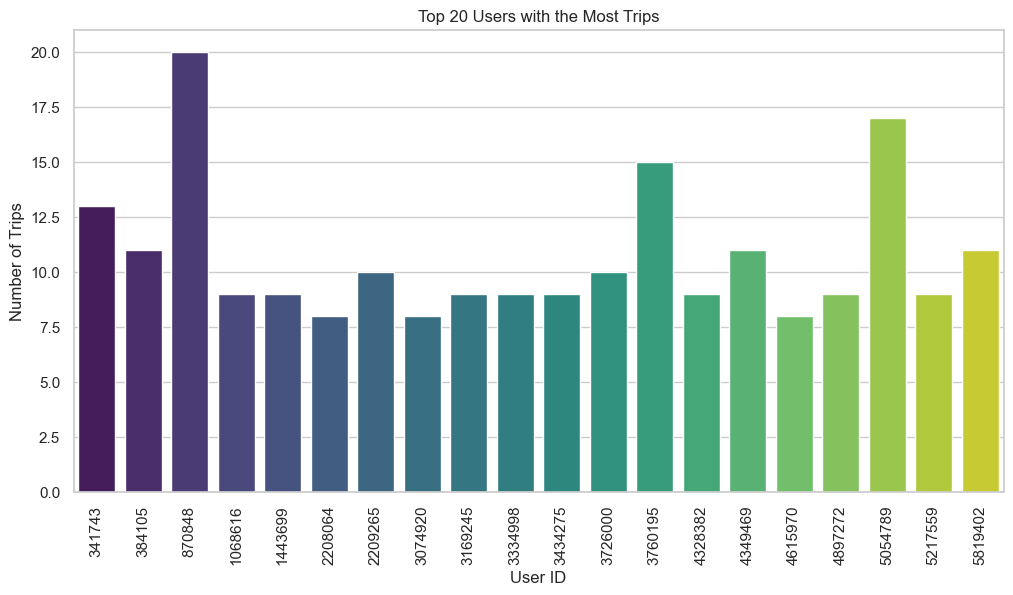

In [29]:
#Top 20 users with most trips
top_users = user_trip_counts.sort_values(by='trip_count', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_users, x='user_id', y='trip_count', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('User ID')
plt.ylabel('Number of Trips')
plt.title('Top 20 Users with the Most Trips')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


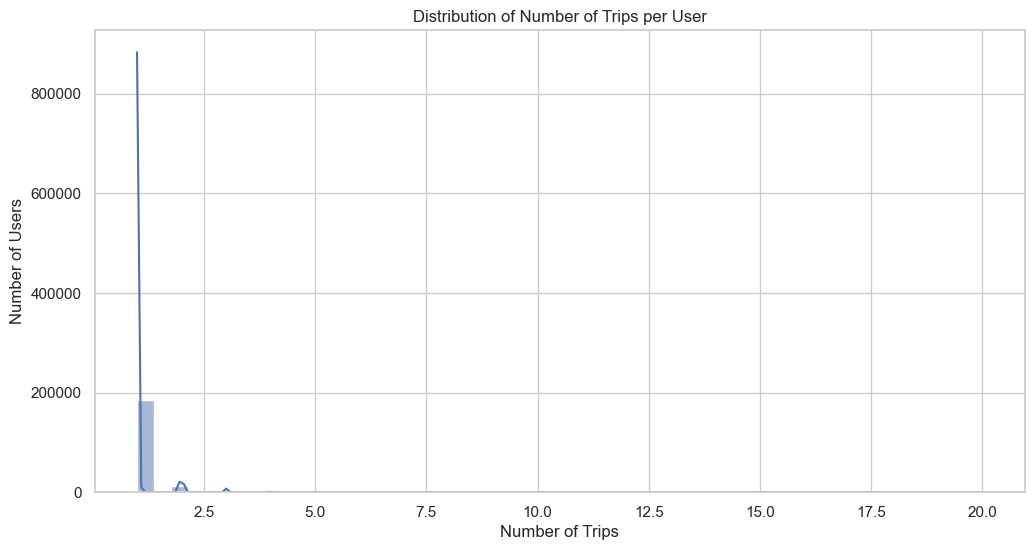

In [30]:
#Trips per User
plt.figure(figsize=(12, 6))
sns.histplot(user_trip_counts['trip_count'], bins=50, kde=True)
plt.xlabel('Number of Trips')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Trips per User')
plt.show()

In [31]:
# Calculate trip duration
train_data['trip_duration'] = (train_data['checkout'] - train_data['checkin']).dt.days

# Extract temporal features
train_data['checkin_month'] = train_data['checkin'].dt.month
train_data['checkin_day_of_week'] = train_data['checkin'].dt.dayofweek

# Calculate average stay duration per user
user_avg_stay_duration = train_data.groupby('user_id')['trip_duration'].mean()
train_data['user_avg_stay_duration'] = train_data['user_id'].map(user_avg_stay_duration)

# Calculate number of previous trips per user
user_trip_counts = train_data.groupby('user_id')['utrip_id'].nunique()
train_data['user_trip_count'] = train_data['user_id'].map(user_trip_counts)

# Calculate the last city and country visited in the current trip
train_data['prev_city_id'] = train_data.groupby('utrip_id')['city_id'].shift(1)
train_data['prev_hotel_country'] = train_data.groupby('utrip_id')['hotel_country'].shift(1)

# Display the first few rows of the engineered dataset
print(train_data.head())

   user_id    checkin   checkout  city_id device_class  affiliate_id  \
0  1000027 2016-08-13 2016-08-14     8183      desktop          7168   
1  1000027 2016-08-14 2016-08-16    15626      desktop          7168   
2  1000027 2016-08-16 2016-08-18    60902      desktop          7168   
3  1000027 2016-08-18 2016-08-21    30628      desktop           253   
4  1000033 2016-04-09 2016-04-11    38677       mobile           359   

  booker_country hotel_country   utrip_id checkin_year_month  checkin_month  \
0        Elbonia        Gondal  1000027_1            2016-08              8   
1        Elbonia        Gondal  1000027_1            2016-08              8   
2        Elbonia        Gondal  1000027_1            2016-08              8   
3        Elbonia        Gondal  1000027_1            2016-08              8   
4         Gondal  Cobra Island  1000033_1            2016-04              4   

   checkin_day_of_week  trip_duration  is_repeat_customer  \
0                    5         

In [32]:
# Group by utrip_id and create the city and country chains
trip_chains = train_data.groupby('utrip_id').agg({
    'user_id': 'first',  # Get the user ID for each trip
    'city_id': lambda x: list(x),  # Array of cities visited
    'hotel_country': lambda x: list(x),  # Array of countries visited
}).reset_index()

# Rename columns for clarity
trip_chains.columns = ['utrip_id', 'user_id', 'cities_chain', 'countries_chain']

# Display the first few rows of the result
print(trip_chains.head())

    utrip_id  user_id                                      cities_chain  \
0  1000027_1  1000027                       [8183, 15626, 60902, 30628]   
1  1000033_1  1000033               [38677, 52089, 21328, 27485, 38677]   
2  1000045_1  1000045  [64876, 55128, 9608, 31817, 36170, 58178, 36063]   
3  1000083_1  1000083                      [55990, 14705, 35160, 36063]   
4   100008_1   100008                 [11306, 12096, 6761, 6779, 65690]   

                                     countries_chain  
0                   [Gondal, Gondal, Gondal, Gondal]  
1  [Cobra Island, Cobra Island, Cobra Island, Cob...  
2  [Fook Island, Fook Island, Fook Island, Carpat...  
3          [Osterlich, Osterlich, Osterlich, Gondal]  
4  [Kamistan, Kamistan, Kamistan, Kamistan, Kamis...  


In [33]:
print(train_data.head())

   user_id    checkin   checkout  city_id device_class  affiliate_id  \
0  1000027 2016-08-13 2016-08-14     8183      desktop          7168   
1  1000027 2016-08-14 2016-08-16    15626      desktop          7168   
2  1000027 2016-08-16 2016-08-18    60902      desktop          7168   
3  1000027 2016-08-18 2016-08-21    30628      desktop           253   
4  1000033 2016-04-09 2016-04-11    38677       mobile           359   

  booker_country hotel_country   utrip_id checkin_year_month  checkin_month  \
0        Elbonia        Gondal  1000027_1            2016-08              8   
1        Elbonia        Gondal  1000027_1            2016-08              8   
2        Elbonia        Gondal  1000027_1            2016-08              8   
3        Elbonia        Gondal  1000027_1            2016-08              8   
4         Gondal  Cobra Island  1000033_1            2016-04              4   

   checkin_day_of_week  trip_duration  is_repeat_customer  \
0                    5         

In [38]:
# Generating Transition Pairs and Calculating Transition Probabilities:

transitions = []

for chain in trip_chains['cities_chain']:
    for i in range(len(chain) - 1):
        transitions.append((chain[i], chain[i + 1]))

transitions_df = pd.DataFrame(transitions, columns=['current_place', 'next_place'])
transition_counts = transitions_df.groupby('current_place')['next_place'].value_counts(normalize=True).unstack(fill_value=0)
print(transition_counts.head())

next_place     2      4      5      6      7      8      11     12     13     \
current_place                                                                  
2                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

next_place     14     ...  67552  67553  67556  67557  67558  67559  67560  \
current_place         ...                                                    
2                0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4                0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5                0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6                0.0  ...    0.0    0.0    0.0   

In [39]:
#Predicting the next city to book on a trip

def predict_next_place(current_city):
    if current_city in transition_counts.index:
        return transition_counts.loc[current_city].idxmax()
    else:
        return None

trip_chains_df['predict_next_city'] = trip_chains_df['cities_chain'].apply(
    lambda chain: predict_next_place(chain[-1]) if len(chain) > 0 else None)
print(trip_chains_df.head())

    utrip_id  user_id                                      cities_chain  \
0  1000027_1  1000027                       [8183, 15626, 60902, 30628]   
1  1000033_1  1000033               [38677, 52089, 21328, 27485, 38677]   
2  1000045_1  1000045  [64876, 55128, 9608, 31817, 36170, 58178, 36063]   
3  1000083_1  1000083                      [55990, 14705, 35160, 36063]   
4   100008_1   100008                 [11306, 12096, 6761, 6779, 65690]   

                                     countries_chain  \
0                   [Gondal, Gondal, Gondal, Gondal]   
1  [Cobra Island, Cobra Island, Cobra Island, Cob...   
2  [Fook Island, Fook Island, Fook Island, Carpat...   
3          [Osterlich, Osterlich, Osterlich, Gondal]   
4  [Kamistan, Kamistan, Kamistan, Kamistan, Kamis...   

                                  city_country_chain  predict_next_city  
0  [8183_Gondal, 15626_Gondal, 60902_Gondal, 3062...            60002.0  
1  [38677_Cobra Island, 52089_Cobra Island, 21328...            

In [41]:
output_file = 'trip_chains.xlsx'
trip_chains_df.to_excel(output_file, index=False)
print(f'Trip chains written to {output_file}')

Trip chains written to trip_chains.xlsx
